In [1]:
from tools import *
from func import *
%matplotlib inline

## 2.4 词典资源
-   词项：包括词目(也叫词条)及其他附加信息。
-   同音异义词：两个含义不同但是拼写相同的分词。
### 2.4.1 词汇列表语料库
过滤文本，删除掉常见英语词典中的单词，留下罕见的或者拼写错误的词汇

In [2]:
show_subtitle("austen-sense 中的非常用词汇")
print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:13])
show_subtitle("nps_chat 中的非常用词汇：")
print(unusual_words(nltk.corpus.nps_chat.words())[:13])

--------------- >austen-sense 中的非常用词汇< ---------------
['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts']
--------------- >nps_chat 中的非常用词汇：< ---------------
['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts']


In [3]:
# 停止词语料库(stopwords)：包括的是高频词汇，是会使说话停止的单词，不是不再使用的单词
from nltk.corpus import stopwords

show_subtitle("english stopwords")
print(stopwords.words('english'))

--------------- >english stopwords< ---------------
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', '

In [4]:
# 利用停止词，筛选掉文本中三分之一的单词
print("reuters 中非停用词所占的比例=", content_fraction(nltk.corpus.reuters.words()))

reuters 中非停用词所占的比例= 0.7364374824583169


In [5]:
# 图2-6：词谜：在由随机选择的字母组成的网格中，选择里面的字母组成单词。
# 这个谜题叫做「目标」
# 使用 ‘egivrvonl’ 字母可以组成多少个不少于6个字母的单词？
# 确保「r」字母出现，其他字母出现频率不高于 puzzle_letters 的要求
puzzle_letters = nltk.FreqDist('egivrvonl')
show_subtitle("puzzle letters tabulate")
puzzle_letters.tabulate()

obligatory = 'r'
word_list = nltk.corpus.words.words()
target_word_list = [
        w
        for w in word_list
        if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters
]
print("target word list= ", target_word_list)

--------------- >puzzle letters tabulate< ---------------
v e g i r o n l 
2 1 1 1 1 1 1 1 
target word list=  ['glover', 'gorlin', 'govern', 'grovel', 'ignore', 'involver', 'lienor', 'linger', 'longer', 'lovering', 'noiler', 'overling', 'region', 'renvoi', 'revolving', 'ringle', 'roving', 'violer', 'virole']


In [6]:
# 使用名字语料库
# 找出同时出现在两个语料库中的名字(即无法分辨性别的名字)
names = nltk.corpus.names
print("name file list=", names.fileids())
male_names = names.words('male.txt')
female_names = names.words('female.txt')
name_list = [
        w
        for w in male_names
        if w in female_names
]
print("name list=", name_list[:13])
print("name list length= ", len(name_list))

name file list= ['female.txt', 'male.txt']
name list= ['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie']
name list length=  365


In [7]:
show_subtitle("使用 set() 函数计算")
print("name list=", list(set(male_names).difference(set(male_names).difference(female_names)))[:13])
print("name list length= ", len(set(male_names).difference(set(male_names).difference(female_names))))

--------------- >使用 set() 函数计算< ---------------
name list= ['Kerry', 'Sonny', 'Jermaine', 'Dale', 'Nickie', 'Eddie', 'Vin', 'Angie', 'Van', 'Donnie', 'Terry', 'Georgie', 'Lauren']
name list length=  365


In [8]:
name_ends = (
        (fileid, name[-2:])
        for fileid in names.fileids()
        for name in names.words(fileid)
)
for i, name_end in enumerate(name_ends):
    if i<13:
        print(name_end)

('female.txt', 'el')
('female.txt', 'il')
('female.txt', 'be')
('female.txt', 'ey')
('female.txt', 'bi')
('female.txt', 'ie')
('female.txt', 'by')
('female.txt', 'el')
('female.txt', 'il')
('female.txt', 'le')
('female.txt', 'ra')
('female.txt', 'ia')
('female.txt', 'da')


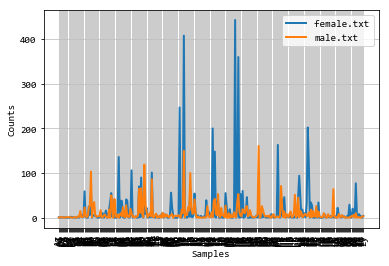

            el  il  be  ey  bi  ie  by  le  ra  ia  da 
female.txt  70  21   7 101  16 408  18 148 163 247 136 
  male.txt  65  24   7  86   2 150  18  42   3   3   0 


In [9]:
name_ends = (
        (fileid, name[-2:])
        for fileid in names.fileids()
        for name in names.words(fileid)
)
cfd = nltk.ConditionalFreqDist(name_ends)
cfd.plot()  # 图2-7 显示男性与女性名字的结尾字母
cfd.tabulate(samples=['el', 'il', 'be', 'ey', 'bi', 'ie', 'by', 'le', 'ra', 'ia', 'da'])

### 2.4.2 发音词典

In [10]:
# cmudict：美国英语的 CMU 发音词典，为语音合成器提供支持
entries = nltk.corpus.cmudict.entries()
print("len(entries)= ", len(entries))
for entry in entries[39943:39951]:
    print(entry)

len(entries)=  133737
('explorer', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0'])
('explorers', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'ER0', 'Z'])
('explores', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'Z'])
('exploring', ['IH0', 'K', 'S', 'P', 'L', 'AO1', 'R', 'IH0', 'NG'])
('explosion', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N'])
('explosions', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'ZH', 'AH0', 'N', 'Z'])
('explosive', ['IH0', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V'])
('explosively', ['EH2', 'K', 'S', 'P', 'L', 'OW1', 'S', 'IH0', 'V', 'L', 'IY0'])


In [11]:
# 寻找词典中发音包含三个音素的条目
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph1, ph2, ph3)

pait P EY1 T
pat P AE1 T
pate P EY1 T
patt P AE1 T
peart P ER1 T
peat P IY1 T
peet P IY1 T
peete P IY1 T
pert P ER1 T
pet P EH1 T
pete P IY1 T
pett P EH1 T
piet P IY1 T
piette P IY1 T
pit P IH1 T
pitt P IH1 T
pot P AA1 T
pote P OW1 T
pott P AA1 T
pout P AW1 T
puett P UW1 T
purt P ER1 T
put P UH1 T
putt P AH1 T


In [12]:
# 寻找所有与 nicks 发音相似的单词
syllable = ['N', 'IH0', 'K', 'S']
word_list = [
        word
        for word, pron in entries
        if pron[-4:] == syllable
]
print(word_list)

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

In [13]:
# 寻找拼写以'n'结尾，发音以'M'结尾的单词
word_list = [
        w
        for w, pron in entries
        if pron[-1] == 'M' and w[-1] == 'n'
]
print(word_list)

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']


In [14]:
# 提取重音数字(0-无重音，1-主重音，2-次重音)
word_list = [
        (w, pron)
        for w, pron in entries
        if stress(pron) == ['0', '1', '0', '2', '0']
]
print(word_list[:13])

[('abbreviated', ['AH0', 'B', 'R', 'IY1', 'V', 'IY0', 'EY2', 'T', 'AH0', 'D']), ('abbreviated', ['AH0', 'B', 'R', 'IY1', 'V', 'IY0', 'EY2', 'T', 'IH0', 'D']), ('abbreviating', ['AH0', 'B', 'R', 'IY1', 'V', 'IY0', 'EY2', 'T', 'IH0', 'NG']), ('accelerated', ['AE0', 'K', 'S', 'EH1', 'L', 'ER0', 'EY2', 'T', 'IH0', 'D']), ('accelerating', ['AE0', 'K', 'S', 'EH1', 'L', 'ER0', 'EY2', 'T', 'IH0', 'NG']), ('accelerator', ['AE0', 'K', 'S', 'EH1', 'L', 'ER0', 'EY2', 'T', 'ER0']), ('accelerators', ['AE0', 'K', 'S', 'EH1', 'L', 'ER0', 'EY2', 'T', 'ER0', 'Z']), ('accentuated', ['AE0', 'K', 'S', 'EH1', 'N', 'CH', 'AH0', 'W', 'EY2', 'T', 'IH0', 'D']), ('accentuating', ['AE0', 'K', 'S', 'EH1', 'N', 'CH', 'AH0', 'W', 'EY2', 'T', 'IH0', 'NG']), ('accommodated', ['AH0', 'K', 'AA1', 'M', 'AH0', 'D', 'EY2', 'T', 'AH0', 'D']), ('accommodating', ['AH0', 'K', 'AA1', 'M', 'AH0', 'D', 'EY2', 'T', 'IH0', 'NG']), ('accommodative', ['AH0', 'K', 'AA1', 'M', 'AH0', 'D', 'EY2', 'T', 'IH0', 'V']), ('accumulated', ['AH0

In [15]:
# 提取重音数字(0-无重音，1-主重音，2-次重音)
word_list = [
        (w, pron)
        for w, pron in entries
        if stress(pron) == ['0', '2', '0', '1', '0']
]
print(word_list[:13])

[('abbreviation', ['AH0', 'B', 'R', 'IY2', 'V', 'IY0', 'EY1', 'SH', 'AH0', 'N']), ('abbreviations', ['AH0', 'B', 'R', 'IY2', 'V', 'IY0', 'EY1', 'SH', 'AH0', 'N', 'Z']), ('abomination', ['AH0', 'B', 'AA2', 'M', 'AH0', 'N', 'EY1', 'SH', 'AH0', 'N']), ('abortifacient', ['AH0', 'B', 'AO2', 'R', 'T', 'AH0', 'F', 'EY1', 'SH', 'AH0', 'N', 'T']), ('abortifacients', ['AH0', 'B', 'AO2', 'R', 'T', 'AH0', 'F', 'EY1', 'SH', 'AH0', 'N', 'T', 'S']), ('academicians', ['AH0', 'K', 'AE2', 'D', 'AH0', 'M', 'IH1', 'SH', 'AH0', 'N', 'Z']), ('accommodation', ['AH0', 'K', 'AA2', 'M', 'AH0', 'D', 'EY1', 'SH', 'AH0', 'N']), ('accommodations', ['AH0', 'K', 'AA2', 'M', 'AH0', 'D', 'EY1', 'SH', 'AH0', 'N', 'Z']), ('accreditation', ['AH0', 'K', 'R', 'EH2', 'D', 'AH0', 'T', 'EY1', 'SH', 'AH0', 'N']), ('accreditations', ['AH0', 'K', 'R', 'EH2', 'D', 'AH0', 'D', 'EY1', 'SH', 'AH0', 'N', 'Z']), ('accumulation', ['AH0', 'K', 'Y', 'UW2', 'M', 'Y', 'AH0', 'L', 'EY1', 'SH', 'AH0', 'N']), ('accumulations', ['AH0', 'K', 'Y'

In [16]:
# 拆分映射、列表、字符串的测试
ex_pron = ('surrealistic', ['S', 'ER0', 'IY2', 'AH0', 'L', 'IH1', 'S', 'T', 'IH0', 'K'])
(word, pron) = ex_pron
show_subtitle(word)
for phone in pron:
    print(phone, end='=')
    for char in phone:
        print(char, end=',')
    print()

--------------- >surrealistic< ---------------
S=S,
ER0=E,R,0,
IY2=I,Y,2,
AH0=A,H,0,
L=L,
IH1=I,H,1,
S=S,
T=T,
IH0=I,H,0,
K=K,


In [17]:
# P69 使用条件频率分布寻找相应词汇的最小对比集
# 找到所有p开头的三音素词，并比照它们的第一个和最后一个音素来分组
p3 = [
        (pron[0] + '-' + pron[2], word)
        for (word, pron) in entries
        if pron[0] == 'P' and len(pron) == 3
]
cfd = nltk.ConditionalFreqDist(p3)
print("cfd['P-P']= ", cfd['P-P'])
show_subtitle("tabulate(P-P, P-R)")
cfd.tabulate(conditions=['P-P', 'P-R'])

for template in cfd.conditions():
    if len(cfd[template]) > 10:
        words = cfd[template].keys()
        wordlist = ' '.join(words)
        print(template, wordlist[:70] + "...")

cfd['P-P']=  <FreqDist with 17 samples and 17 outcomes>
--------------- >tabulate(P-P, P-R)< ---------------
     paap paape  paar  pair   pap  pape  papp   par  pare  parr  paup  pear  peep  peer   pep  pier   pip  pipe  pipp  poop  poor poore   pop  pope  popp poppe   por  pore  porr  pour   pup 
P-P     1     1     0     0     1     1     1     0     0     0     1     0     1     0     1     0     1     1     1     1     0     0     1     1     1     1     0     0     0     0     1 
P-R     0     0     1     1     0     0     0     1     1     1     0     1     0     1     0     1     0     0     0     0     1     1     0     0     0     0     1     1     1     1     0 
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-L pahl

In [18]:
# 访问词典的方式
prondict = nltk.corpus.cmudict.dict()
print("prondict['fire']= ",prondict['fire'])
# print("prondict['blog'] = ",prondict['blog']  # 词典中没有，报错KeyError
# 词典元素赋值
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
print("prondict['blog']= ",prondict['blog'])

prondict['fire']=  [['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]
prondict['blog']=  [['B', 'L', 'AA1', 'G']]


In [19]:
# 在词典中寻找单词的发音
text = ['natural', 'language', 'processing']
pron_list = [
        ph
        for w in text
        for ph in prondict[w][0]
]
print("word pronoun list= ", pron_list)

word pronoun list=  ['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']


In [20]:
# 加[0]是因为natural有两个发音，取其中一个就好了
pron_list = [
        ph
        for w in text
        for ph in prondict[w]
]
print("'natural' pronoun list= ", pron_list)
print("prondict['natural']=", prondict['natural'])

'natural' pronoun list=  [['N', 'AE1', 'CH', 'ER0', 'AH0', 'L'], ['N', 'AE1', 'CH', 'R', 'AH0', 'L'], ['L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH'], ['L', 'AE1', 'NG', 'G', 'W', 'IH0', 'JH'], ['P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']]
prondict['natural']= [['N', 'AE1', 'CH', 'ER0', 'AH0', 'L'], ['N', 'AE1', 'CH', 'R', 'AH0', 'L']]


### 2.4.3 比较词表（Swadesh wordlists）

In [21]:
# 包括几种语言的约200个常用词的列表，可以用于比较两个语言之间的差别，也可以用于不同语言的单词翻译
from nltk.corpus import swadesh

print("swadesh.fileids()= ",swadesh.fileids())
print("swadesh.words('en')= ",swadesh.words('en'))

swadesh.fileids()=  ['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']
swadesh.words('en')=  ['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart

In [22]:
fr2en = swadesh.entries(['fr', 'en'])
print("fr2en= ",fr2en[:13])
translate = dict(fr2en)
print("translate['chien']= ", translate['chien'])

fr2en=  [('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where')]
translate['chien']=  dog


In [23]:
print("translate= ", translate)

translate=  {'je': 'I', 'tu, vous': 'you (singular), thou', 'il': 'he', 'nous': 'we', 'vous': 'you (plural)', 'ils, elles': 'they', 'ceci': 'this', 'cela': 'that', 'ici': 'here', 'là': 'there', 'qui': 'who', 'quoi': 'what', 'où': 'where', 'quand': 'when', 'comment': 'how', 'ne...pas': 'not', 'tout': 'all', 'plusieurs': 'many', 'quelques': 'some', 'peu': 'few', 'autre': 'other', 'un': 'one', 'deux': 'two', 'trois': 'three', 'quatre': 'four', 'cinq': 'five', 'grand': 'big', 'long': 'long', 'large': 'wide', 'épais': 'thick', 'lourd': 'heavy', 'petit': 'small', 'court': 'short', 'étroit': 'narrow', 'mince': 'thin', 'femme': 'woman', 'homme': 'man (human being)', 'enfant': 'child', 'femme, épouse': 'wife', 'mari, époux': 'husband', 'mère': 'mother', 'père': 'father', 'animal': 'animal', 'poisson': 'fish', 'oiseau': 'bird', 'chien': 'dog', 'pou': 'louse', 'serpent': 'snake', 'ver': 'worm', 'arbre': 'tree', 'forêt': 'forest', 'bâton': 'stick', 'fruit': 'fruit', 'graine': 'seed', 'feuille': 'l

In [24]:
de2en = swadesh.entries(['de', 'en'])
translate.update(dict(de2en))
es2en = swadesh.entries(['es', 'en'])
translate.update(dict(es2en))
print("translate['jeter']= ", translate['jeter'])
print("translate['Hund']= ", translate['Hund'])
print("translate['perro']= ", translate['perro'])

translate['jeter']=  throw
translate['Hund']=  dog
translate['perro']=  dog


In [25]:
print("translate= ", translate)

translate=  {'je': 'I', 'tu, vous': 'you (singular), thou', 'il': 'he', 'nous': 'we', 'vous': 'you (plural)', 'ils, elles': 'they', 'ceci': 'this', 'cela': 'that', 'ici': 'here', 'là': 'there', 'qui': 'who', 'quoi': 'what', 'où': 'where', 'quand': 'when', 'comment': 'how', 'ne...pas': 'not', 'tout': 'all', 'plusieurs': 'many', 'quelques': 'some', 'peu': 'few', 'autre': 'other', 'un': 'one', 'deux': 'two', 'trois': 'three', 'quatre': 'four', 'cinq': 'five', 'grand': 'big', 'long': 'long', 'large': 'wide', 'épais': 'thick', 'lourd': 'heavy', 'petit': 'small', 'court': 'short', 'étroit': 'narrow', 'mince': 'thin', 'femme': 'woman', 'homme': 'man (human being)', 'enfant': 'child', 'femme, épouse': 'wife', 'mari, époux': 'husband', 'mère': 'mother', 'père': 'father', 'animal': 'animal', 'poisson': 'fish', 'oiseau': 'bird', 'chien': 'dog', 'pou': 'louse', 'serpent': 'snake', 'ver': 'see', 'arbre': 'tree', 'forêt': 'forest', 'bâton': 'stick', 'fruit': 'fruit', 'graine': 'seed', 'feuille': 'le

In [26]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


### 2.4.4 词汇工具：Toolbox 和 Shoebox
[Toolbox](http://www.sil.org/computing/toolbox/)

Toolbox 文件由一些条目的集合组成，其中每个条目由一个 或者 多个字段组成。
大多数字段都是可选的 或者  重复的，因此这个词汇资源不能作为一个表格 或者 电子表格处理。

In [27]:
from nltk.corpus import toolbox

rotokas = toolbox.entries('rotokas.dic')
for i, word in enumerate(rotokas):
    if i<=13:
        print(word)

('kaa', [('ps', 'V'), ('pt', 'A'), ('ge', 'gag'), ('tkp', 'nek i pas'), ('dcsv', 'true'), ('vx', '1'), ('sc', '???'), ('dt', '29/Oct/2005'), ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'), ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'), ('xe', 'Apoka is gagging from food while talking.')])
('kaa', [('ps', 'V'), ('pt', 'B'), ('ge', 'strangle'), ('tkp', 'pasim nek'), ('arg', 'O'), ('vx', '2'), ('dt', '07/Oct/2006'), ('ex', 'Rera rauroro rera kaarevoi.'), ('xp', 'Em i holim pas em na nekim em.'), ('xe', 'He is holding him and strangling him.'), ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'), ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'), ('xe', "They strangled the man's neck with rope because he was very stubborn and arrogant."), ('ex', 'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'), ('xp', 'Ol i pasim nek bilong man long rop. Olsem na em i no pulim win olsem na em i 